<a href="https://colab.research.google.com/github/Vu529/P.h.D-AI-project/blob/main/V%26N_Biohack_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving TB.xlsx to TB.xlsx


In [3]:
import pandas as pd

df2 = pd.read_excel('TB.xlsx')
df2

,Class,canonical_smiles
0,Active,CC1=CC(=CC(=C1)CN2C(=O)C(=C(C=N2)Cl)Cl)C
1,Active,CC1=CC=CC=C1N2C3=C(C=N2)C(=CC(=C3)[N+](=O)[O-]...
2,Active,C1=CSC(=C1)C=C2C(=O)N(C(=S)S2)CCCC(=O)NC3=CC=C...
3,Active,CC1=CC=C(C=C1)CS(=O)(=O)C2=NC=C(C(=N2)C(=O)NC3...
4,Active,CC(C)C1=NN=C(S1)NC(=O)C2=NC(=NC=C2Cl)S(=O)(=O)...
...,...,...
125,Inactive,CN1C(=C(C(=O)N(C1=O)C)C2=NN(C(C2)C3=CC=CC=C3)C...
126,Inactive,CC1=C(SC=C1)C=NNC(=O)CC2=CC(=O)NN2
127,Inactive,C1=CC(=CC=C1C2=CC(=O)NN2)Br
128,Inactive,CC(=NNC(=O)CC1=CC(=O)NN1)C2=CC(=CC=C2)[N+](=O)...


In [4]:
df_class = df2.drop(columns='canonical_smiles')
df_class

,Class
0,Active
1,Active
2,Active
3,Active
4,Active
...,...
125,Inactive
126,Inactive
127,Inactive
128,Inactive


In [5]:
! pip install padelpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
! wget https://github.com/dataprofessor/padel/raw/main/fingerprints_xml.zip
! unzip fingerprints_xml.zip

--2022-07-29 12:12:58--  https://github.com/dataprofessor/padel/raw/main/fingerprints_xml.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/padel/main/fingerprints_xml.zip [following]
--2022-07-29 12:12:58--  https://raw.githubusercontent.com/dataprofessor/padel/main/fingerprints_xml.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10871 (11K) [application/zip]
Saving to: ‘fingerprints_xml.zip.1’

fingerprints_xml.zi 100%[===================>]  10.62K  --.-KB/s    in 0s      

2022-07-29 12:12:58 (79.6 MB/s) - ‘fingerprints_xml.zip.1’ saved [10871/10871]

Archive:  fingerprint

In [7]:
import glob
xml_files = glob.glob("*.xml")
xml_files.sort()
xml_files

['AtomPairs2DFingerprintCount.xml',
 'AtomPairs2DFingerprinter.xml',
 'EStateFingerprinter.xml',
 'ExtendedFingerprinter.xml',
 'Fingerprinter.xml',
 'GraphOnlyFingerprinter.xml',
 'KlekotaRothFingerprintCount.xml',
 'KlekotaRothFingerprinter.xml',
 'MACCSFingerprinter.xml',
 'PubchemFingerprinter.xml',
 'SubstructureFingerprintCount.xml',
 'SubstructureFingerprinter.xml']

In [8]:
FP_list = ['AtomPairs2DCount',
           'AtomPairs2D',
           'EState',
           'CDKextended',
           'CDK',
           'CDKgraphonly',
           'KlekotaRothCount',
           'KlekotaRoth',
           'MACC',
           'Pubchem',
           'SubstructureCount',
           'Substructure']

In [9]:
fp = dict(zip(FP_list, xml_files))
fp

{'AtomPairs2D': 'AtomPairs2DFingerprinter.xml',
 'AtomPairs2DCount': 'AtomPairs2DFingerprintCount.xml',
 'CDK': 'Fingerprinter.xml',
 'CDKextended': 'ExtendedFingerprinter.xml',
 'CDKgraphonly': 'GraphOnlyFingerprinter.xml',
 'EState': 'EStateFingerprinter.xml',
 'KlekotaRoth': 'KlekotaRothFingerprinter.xml',
 'KlekotaRothCount': 'KlekotaRothFingerprintCount.xml',
 'MACC': 'MACCSFingerprinter.xml',
 'Pubchem': 'PubchemFingerprinter.xml',
 'Substructure': 'SubstructureFingerprinter.xml',
 'SubstructureCount': 'SubstructureFingerprintCount.xml'}

In [10]:
selection = ['canonical_smiles','Class']
df3_selection = df2[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)


In [11]:
! cat molecule.smi | head -5

CC1=CC(=CC(=C1)CN2C(=O)C(=C(C=N2)Cl)Cl)C	Active
CC1=CC=CC=C1N2C3=C(C=N2)C(=CC(=C3)[N+](=O)[O-])[N+](=O)[O-]	Active
C1=CSC(=C1)C=C2C(=O)N(C(=S)S2)CCCC(=O)NC3=CC=C(C=C3)O	Active
CC1=CC=C(C=C1)CS(=O)(=O)C2=NC=C(C(=N2)C(=O)NC3=NN=C(S3)C(C)C)Cl	Active
CC(C)C1=NN=C(S1)NC(=O)C2=NC(=NC=C2Cl)S(=O)(=O)CC3=CC=C(C=C3)F	Active


In [12]:
from padelpy import padeldescriptor
fingerprint = 'Substructure'
Substructure_output_file = ''.join([fingerprint, '.excel']) #'Substructure.csv'
fingerprint_descriptortypes = fp[fingerprint]

padeldescriptor(mol_dir='molecule.smi',
                  d_file=Substructure_output_file,#'Substructure.csv'
                  #descriptortypes='SubstructureFingerprint.xml'),
                  descriptortypes= fingerprint_descriptortypes,
                  detectaromaticity=True,
                  standardizenitro=True,
                  standardizetautomers=True,
                  threads=2,
                  removesalt=True,
                  log=True,
                  fingerprints=True)

In [13]:
Descriptors =pd.read_csv(Substructure_output_file)
Descriptors

,Name,SubFP1,SubFP2,SubFP3,SubFP4,SubFP5,SubFP6,SubFP7,SubFP8,SubFP9,...,SubFP298,SubFP299,SubFP300,SubFP301,SubFP302,SubFP303,SubFP304,SubFP305,SubFP306,SubFP307
0,Active,1,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,0,0,0,1
1,Active,1,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,0,0,0,1
2,Active,0,1,0,0,0,0,0,0,0,...,0,0,1,1,1,1,0,0,0,1
3,Active,1,0,1,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
4,Active,1,0,1,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,Inactive,0,1,1,0,0,0,0,1,0,...,0,0,1,1,1,0,0,0,0,1
126,Inactive,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
127,Inactive,1,1,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
128,Inactive,1,1,0,0,0,0,0,0,0,...,1,1,1,1,1,0,0,0,0,1


In [14]:
Substructure = Descriptors.drop(columns='Name')
Substructure

,SubFP1,SubFP2,SubFP3,SubFP4,SubFP5,SubFP6,SubFP7,SubFP8,SubFP9,SubFP10,...,SubFP298,SubFP299,SubFP300,SubFP301,SubFP302,SubFP303,SubFP304,SubFP305,SubFP306,SubFP307
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,0,0,0,1
3,1,0,1,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
4,1,0,1,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0,1,1,0,0,0,0,1,0,0,...,0,0,1,1,1,0,0,0,0,1
126,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
127,1,1,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
128,1,1,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,0,0,0,1


In [15]:
from padelpy import padeldescriptor
fingerprint = 'Pubchem'
Pubchem_output_file = ''.join([fingerprint, '.excel']) #'MACC.csv'
fingerprint_descriptortypes = fp[fingerprint]

padeldescriptor(mol_dir='molecule.smi',
                  d_file=Pubchem_output_file,#'MACC.csv'
                  #descriptortypes='MACCFingerprint.xml'),
                  descriptortypes= fingerprint_descriptortypes,
                  detectaromaticity=True,
                  standardizenitro=True,
                  standardizetautomers=True,
                  threads=2,
                  removesalt=True,
                  log=True,
                  fingerprints=True)

In [16]:
Descriptors1 =pd.read_csv(Pubchem_output_file)
Descriptors1

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,Active,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Active,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Active,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Active,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Active,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,Inactive,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
126,Inactive,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127,Inactive,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
128,Inactive,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
Pubchem = Descriptors1.drop(columns='Name')
Pubchem

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
126,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
127,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
128,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df_combined = pd.concat([Substructure, Pubchem, df_class], axis=1)
df_combined

,SubFP1,SubFP2,SubFP3,SubFP4,SubFP5,SubFP6,SubFP7,SubFP8,SubFP9,SubFP10,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,Class
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Active
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Active
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Active
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Active
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Inactive
126,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Inactive
127,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Inactive
128,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Inactive


In [19]:
X = df_combined.drop('Class', axis=1)
X

,SubFP1,SubFP2,SubFP3,SubFP4,SubFP5,SubFP6,SubFP7,SubFP8,SubFP9,SubFP10,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
126,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
128,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
Y = df_combined.Class
Y

0        Active
1        Active
2        Active
3        Active
4        Active
         ...   
125    Inactive
126    Inactive
127    Inactive
128    Inactive
129    Inactive
Name: Class, Length: 130, dtype: object

In [21]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [22]:
X.shape

(130, 179)

In [39]:
X

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0]])

# Machine Learning model

In [34]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [36]:
X_train.shape, Y_train.shape


((104, 179), (104,))

In [37]:
X_test.shape, Y_test.shape


((26, 179), (26,))

In [38]:
import numpy as np
np.random.seed(100)
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

1.0

In [1]:
! pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [24]:
X_train.shape, Y_train.shape

((104, 179), (104,))

In [25]:
X_test.shape, Y_test.shape

((26, 179), (26,))

In [26]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 29/29 [00:00<00:00, 176282.34it/s]


In [27]:
predictions_train

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.00,1.00,None,1.00,0.13
LinearDiscriminantAnalysis,1.00,1.00,None,1.00,0.07
XGBClassifier,1.00,1.00,None,1.00,0.17
SGDClassifier,1.00,1.00,None,1.00,0.03
RidgeClassifier,1.00,1.00,None,1.00,0.03
RandomForestClassifier,1.00,1.00,None,1.00,0.22
QuadraticDiscriminantAnalysis,1.00,1.00,None,1.00,0.06
Perceptron,1.00,1.00,None,1.00,0.03
PassiveAggressiveClassifier,1.00,1.00,None,1.00,0.03


In [31]:
predictions_test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,


[(0.0, 1.0)]

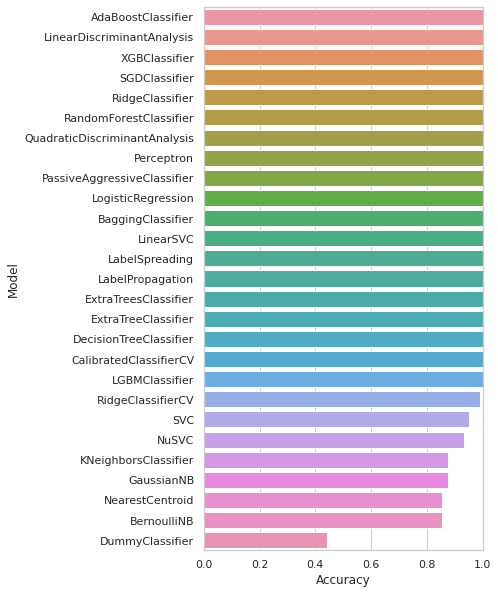

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Accuracy", data=predictions_train)
ax.set(xlim=(0, 1))

In [64]:
Y_pred = model.predict(X_test)

In [ ]:
df_combined.to_csv('TB_cytotoxicity.csv', index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

In [ ]:
! mkdir '/content/gdrive/My Drive/Colab Notebooks/dataTB'

In [ ]:
! cp TB_cytotoxicity.csv '/content/gdrive/My Drive/Colab Notebooks/dataTB'

In [ ]:
! ls -l '/content/gdrive/My Drive/Colab Notebooks/dataTB'